In [13]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [14]:
img = cv2.imread('./test/download.jpg')
img.shape

(225, 225, 3)

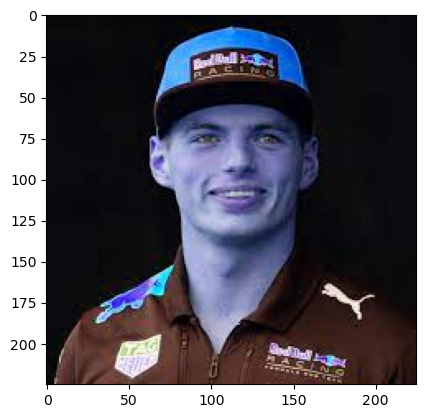

In [15]:
plt.imshow(img)

In [16]:
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grayimg.shape

(225, 225)

In [17]:
grayimg

array([[ 9,  9,  9, ...,  9,  9,  9],
       [ 9,  9,  9, ...,  9,  9,  9],
       [ 9,  9,  9, ...,  9,  9,  9],
       ...,
       [ 1, 13, 10, ..., 19, 21, 19],
       [13,  6,  1, ..., 19, 21, 19],
       [ 9,  8, 12, ..., 21, 21, 19]], dtype=uint8)

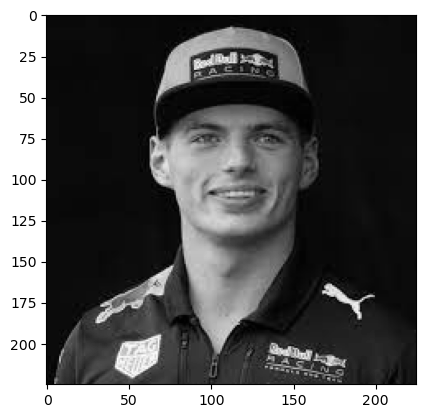

In [18]:
plt.imshow(grayimg, cmap='gray')

In [31]:
#face
f_cascade = cv2.CascadeClassifier('./opencv/harrcascade/haarcascade_frontalface_default.xml')
#eye
e_cascade = cv2.CascadeClassifier('./opencv/harrcascade/haarcascade_eye.xml')
face = f_cascade.detectMultiScale(grayimg,1.3,5)
face

array([[77, 45, 83, 83]])

In [32]:
(x,y,w,h) = face[0]
x,y,w,h

(77, 45, 83, 83)

In [33]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [34]:
cv2.destroyAllWindows()
for (x,y,w,h) in face:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = grayimg[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = e_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

C:\Users\navee\AppData\Local\Temp\ipykernel_15504\695528118.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [35]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [36]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = f_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = e_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [37]:
crop_img = get_cropped_image('./test/download.jpg')
plt.imshow(crop_img)

In [60]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/crop/"

In [61]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [62]:
img_dirs

['./dataset/crop',
 './dataset/fernando alonso - Google Search',
 './dataset/lance stroll - Google Search',
 './dataset/lewis hamilton - Google Search',
 './dataset/max verstappen - Google Search',
 './dataset/Michael schumacher face - Google Search',
 './dataset/serigo perez - Google Search']

In [63]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [64]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    racer_name = img_dir.split('/')[-1]
    print(racer_name)
    
    celebrity_file_names_dict[racer_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + racer_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = racer_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[racer_name].append(cropped_file_path)
            count += 1   

crop
fernando alonso - Google Search
Generating cropped images in folder:  ./dataset/crop/fernando alonso - Google Search
lance stroll - Google Search
Generating cropped images in folder:  ./dataset/crop/lance stroll - Google Search
lewis hamilton - Google Search
Generating cropped images in folder:  ./dataset/crop/lewis hamilton - Google Search
max verstappen - Google Search
Generating cropped images in folder:  ./dataset/crop/max verstappen - Google Search
Michael schumacher face - Google Search
Generating cropped images in folder:  ./dataset/crop/Michael schumacher face - Google Search
serigo perez - Google Search
Generating cropped images in folder:  ./dataset/crop/serigo perez - Google Search


In [65]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [66]:
im_har = w2d(crop_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [67]:
racer_file_names_dict = {}
for img_dir in cropped_image_dirs:
    racer_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    racer_file_names_dict[racer_name] = file_list
racer_file_names_dict

{'fernando alonso - Google Search': ['./dataset/crop/fernando alonso - Google Search\\fernando alonso - Google Search1.png',
  './dataset/crop/fernando alonso - Google Search\\fernando alonso - Google Search10.png',
  './dataset/crop/fernando alonso - Google Search\\fernando alonso - Google Search11.png',
  './dataset/crop/fernando alonso - Google Search\\fernando alonso - Google Search12.png',
  './dataset/crop/fernando alonso - Google Search\\fernando alonso - Google Search13.png',
  './dataset/crop/fernando alonso - Google Search\\fernando alonso - Google Search14.png',
  './dataset/crop/fernando alonso - Google Search\\fernando alonso - Google Search15.png',
  './dataset/crop/fernando alonso - Google Search\\fernando alonso - Google Search16.png',
  './dataset/crop/fernando alonso - Google Search\\fernando alonso - Google Search17.png',
  './dataset/crop/fernando alonso - Google Search\\fernando alonso - Google Search18.png',
  './dataset/crop/fernando alonso - Google Search\\ferna

In [68]:
class_dict = {}
count = 0
for racer_name in racer_file_names_dict.keys():
    class_dict[racer_name] = count
    count = count + 1
class_dict

{'fernando alonso - Google Search': 0,
 'lance stroll - Google Search': 1,
 'lewis hamilton - Google Search': 2,
 'max verstappen - Google Search': 3,
 'Michael schumacher face - Google Search': 4,
 'serigo perez - Google Search': 5}

In [69]:
X, y = [], []
for racer_name, training_files in racer_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[racer_name])

In [70]:
len(X[0])

4096

In [71]:
X[0]

array([[ 86],
       [ 88],
       [ 89],
       ...,
       [181],
       [152],
       [ 56]], dtype=uint8)

In [72]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(283, 4096)

MODEL TRAINING

In [73]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])

# Perform cross-validation to get the scores
scores = cross_val_score(pipe, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Get the best score from the cross-validation
best_score = max(scores)

print("Best cross-validation score:", best_score)

Best cross-validation score: 0.7142857142857143


In [77]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [78]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [79]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.665559,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.504651,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.655592,{'logisticregression__C': 1}


In [80]:
best_estimators['svm'].score(X_test,y_test)

0.7605633802816901

In [81]:
best_estimators['random_forest'].score(X_test,y_test)

0.5915492957746479

In [82]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.647887323943662

In [83]:
best_clf = best_estimators['svm']

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 3,  2,  1,  0,  0,  0],
       [ 2, 33,  0,  0,  0,  0],
       [ 1,  1,  1,  0,  3,  1],
       [ 0,  0,  0,  5,  0,  1],
       [ 0,  0,  1,  0,  9,  0],
       [ 0,  4,  0,  0,  0,  3]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

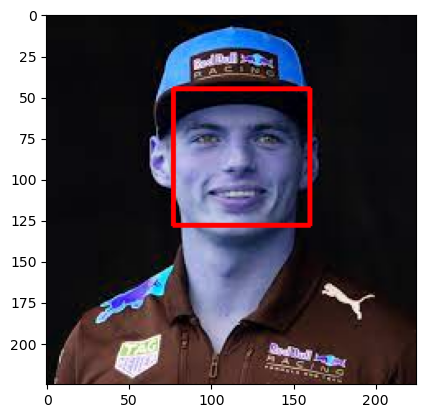

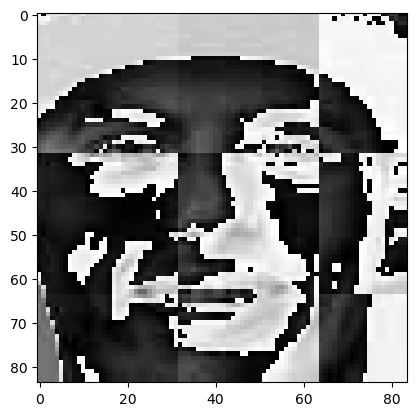

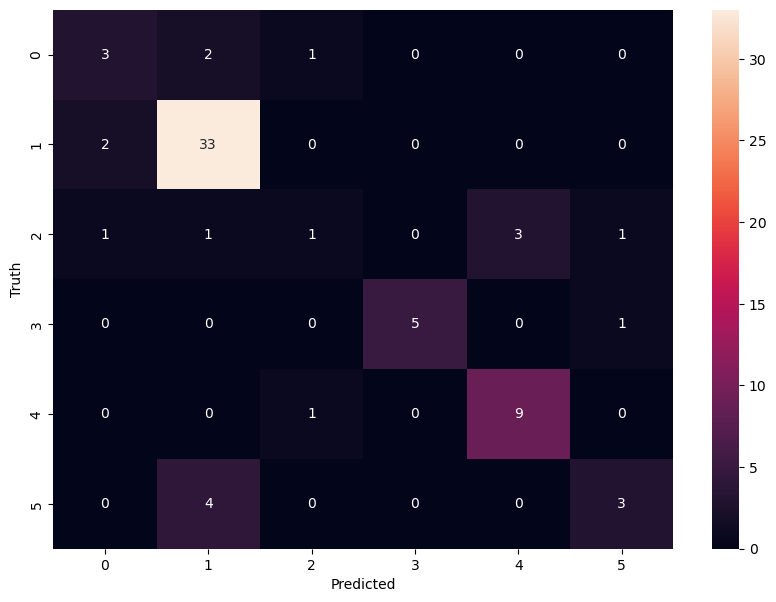

In [85]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
class_dict

{'fernando alonso - Google Search': 0,
 'lance stroll - Google Search': 1,
 'lewis hamilton - Google Search': 2,
 'max verstappen - Google Search': 3,
 'Michael schumacher face - Google Search': 4,
 'serigo perez - Google Search': 5}

In [88]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model1.pkl') 

['saved_model1.pkl']

In [98]:
import gradio as gr
import numpy as np
import joblib
import cv2

# Load the trained model
model = joblib.load('saved_model.pkl')

# Define the w2d function
def w2d(img, mode='haar', level=1):
    # Implementation of the wavelet transformation function
    imArray = img
    # Datatype conversions
    # Convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # Convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    # Compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    # Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

# Function to preprocess the image
def preprocess_image(image):
    # Resize the image to 32x32
    image_resized = cv2.resize(image, (32, 32))
    # Apply the w2d function to the resized image
    img_har = w2d(image_resized, 'db1', 5)
    # Flatten the images and combine them
    combined_img = np.hstack((image_resized.reshape(-1), img_har.reshape(-1)))
    return combined_img.reshape(1, -1)

# Function to make predictions
def predict_f1_racer(image):
    preprocessed_image = preprocess_image(image)
    prediction = model.predict(preprocessed_image)[0]
    return list(class_dict.keys())[list(class_dict.values()).index(prediction)]

# Gradio Interface
iface = gr.Interface(
    fn=predict_f1_racer,
    inputs=gr.inputs.Image(),
    outputs=gr.outputs.Textbox(),
    live=True,
    capture_session=True,
    title="F1 Racer Image Classifier",
    description="Upload an image of an F1 racer to get the predicted driver name."
)

# Launch the interface
iface.launch()


c:\Users\navee\miniconda3\envs\tf\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\navee\miniconda3\envs\tf\lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
c:\Users\navee\miniconda3\envs\tf\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\navee\AppData\Local\Temp\ipykernel_15504\2215414149.py:50: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  iface = gr.Interface(


Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\navee\miniconda3\envs\tf\lib\site-packages\gradio\routes.py", line 437, in run_predict
    output = await app.get_blocks().process_api(
  File "c:\Users\navee\miniconda3\envs\tf\lib\site-packages\gradio\blocks.py", line 1352, in process_api
    result = await self.call_function(
  File "c:\Users\navee\miniconda3\envs\tf\lib\site-packages\gradio\blocks.py", line 1077, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\navee\miniconda3\envs\tf\lib\site-packages\anyio\to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "c:\Users\navee\miniconda3\envs\tf\lib\site-packages\anyio\_backends\_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "c:\Users\navee\miniconda3\envs\tf\lib\site-packages\anyio\_backends\_asyncio.py", line 807, in run
    result = context.run(func, *args)
  File "C:\Users\navee\AppData\Local\Temp\ipykernel_1

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))